In [6]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 🌍 Load the dataset
df = pd.read_csv("owid-covid-data.csv")
print("Data Loaded Successfully")
df['date'] = pd.to_datetime(df['date'])

# 👀 Preview the data
print(df.head())
print(df.columns)

# 🔎 Check for missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))


Data Loaded Successfully
  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan 2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987 

## Insights from Initial Data Exploration

1. **Dataset Overview**: The dataset contains COVID-19 data from various countries, with columns such as `total_cases`, `total_deaths`, `new_cases`, and `new_deaths`, among others.

2. **Date Conversion**: The `date` column has been successfully converted to a datetime format, enabling time-series analysis.

3. **Missing Values**: A significant number of missing values are present in certain columns, such as `icu_patients`, `weekly_icu_admissions`, and `new_tests`. This indicates potential data quality issues or incomplete reporting by some countries.

4. **Column Diversity**: The dataset includes a wide range of metrics, from case counts to vaccination data, allowing for comprehensive analysis of the pandemic's impact.

5. **Next Steps**: Address missing values through imputation, interpolation, or exclusion, depending on the analysis requirements.

In [15]:
# 🎯 Focus on selected countries
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]

# 📅 Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# 🧼 Drop rows with missing critical values
df = df.dropna(subset=['total_cases', 'total_deaths'])

# 📈 Fill or interpolate other missing values
df[['new_cases', 'new_deaths', 'total_vaccinations']] = df[['new_cases', 'new_deaths', 'total_vaccinations']].fillna(0)



## Insights from Data Preparation

1. **Selected Countries**: The dataset has been filtered to include only Kenya, India, and the United States, allowing for a focused analysis of these countries.

2. **Date Conversion**: The `date` column has been successfully converted to a datetime format, enabling time-series analysis.

3. **Critical Data Retention**: Rows with missing values in critical columns (`total_cases`, `total_deaths`) have been dropped to ensure data integrity.

4. **Missing Value Handling**: Non-critical columns (`new_cases`, `new_deaths`, `total_vaccinations`) have been filled with zeros, ensuring no gaps in the data for these metrics.

5. **Prepared for Analysis**: The dataset is now clean and ready for further exploration, visualization, and analysis of COVID-19 trends in the selected countries.


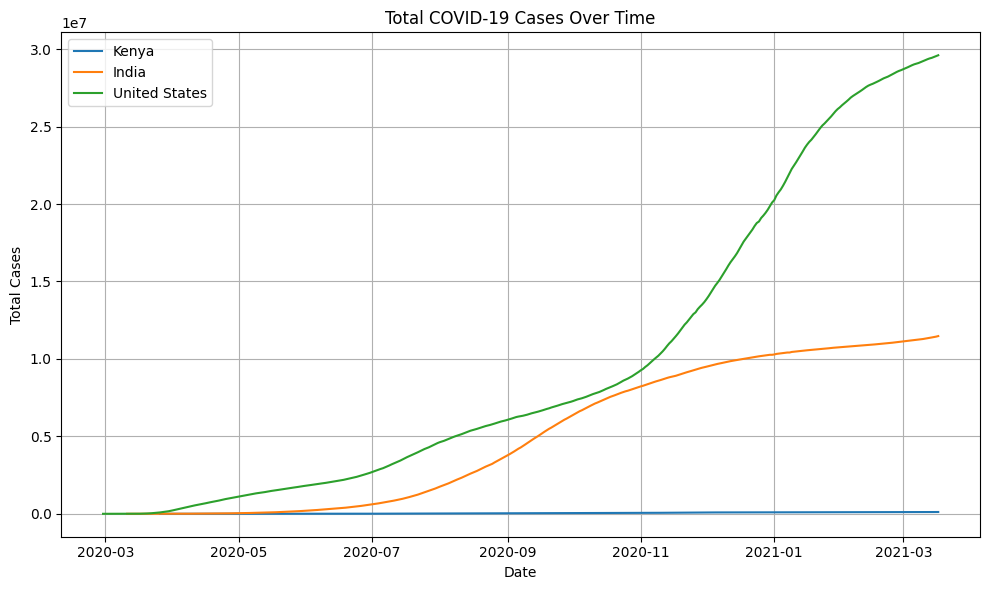

In [16]:
# 🧮 Plot total cases over time
plt.figure(figsize=(10, 6))
for country in countries:
    temp = df[df['location'] == country]
    plt.plot(temp['date'], temp['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## Findings: Total COVID-19 Cases Over Time

1. **Trend Analysis**: The plot shows the cumulative total COVID-19 cases over time for Kenya, India, and the United States.
2. **United States**: The United States exhibits the highest number of total cases, with a steep rise during multiple waves of the pandemic.
3. **India**: India shows a significant increase in cases, particularly during the second wave in 2021.
4. **Kenya**: Kenya has a relatively lower number of total cases compared to India and the United States, with a slower rate of increase.
5. **Insights**: The differences in trends may be attributed to factors such as population size, testing rates, healthcare infrastructure, and government interventions.

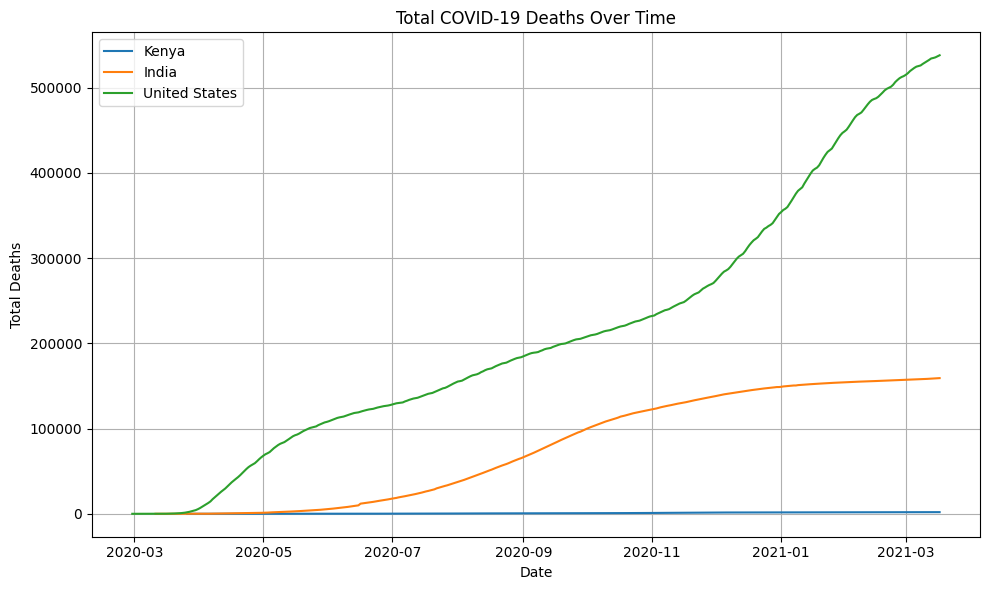

In [17]:
# 💀 Plot total deaths over time
plt.figure(figsize=(10, 6))
for country in countries:
    temp = df[df['location'] == country]
    plt.plot(temp['date'], temp['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## Findings: Total COVID-19 Deaths Over Time

1. **Trend Analysis**: The plot illustrates the cumulative total COVID-19 deaths over time for Kenya, India, and the United States.
2. **United States**: The United States shows the highest number of total deaths, with sharp increases during multiple waves of the pandemic.
3. **India**: India experienced significant spikes in total deaths, particularly during the second wave in 2021.
4. **Kenya**: Kenya has a comparatively lower number of total deaths, with a slower rate of increase compared to India and the United States.
5. **Insights**: The differences in death trends may be influenced by factors such as healthcare infrastructure, population demographics, vaccination rates, and government interventions.

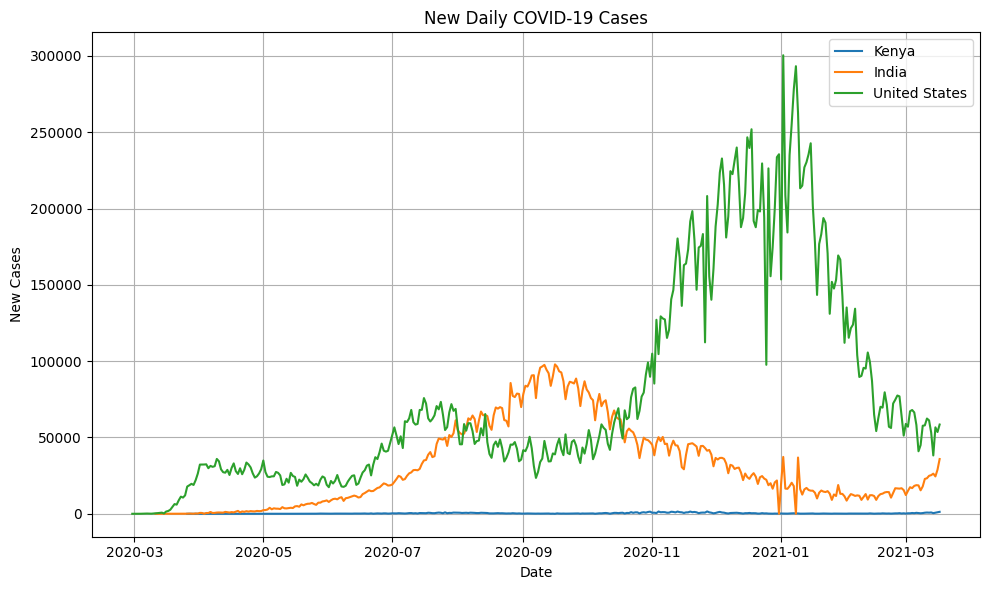

In [18]:
# 📊 Compare daily new cases
plt.figure(figsize=(10, 6))
for country in countries:
    temp = df[df['location'] == country]
    plt.plot(temp['date'], temp['new_cases'], label=country)
plt.title("New Daily COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## Findings: New Daily COVID-19 Cases

1. **Trend Analysis**: The plot illustrates the daily new COVID-19 cases for Kenya, India, and the United States over time.
2. **United States**: The United States shows significant fluctuations in daily new cases, with multiple peaks corresponding to different waves of the pandemic.
3. **India**: India exhibits a sharp increase in daily new cases during the second wave in 2021, followed by a decline.
4. **Kenya**: Kenya has relatively lower daily new cases compared to India and the United States, with smaller peaks.
5. **Insights**: The differences in daily new cases may be influenced by factors such as population size, testing rates, public health measures, and vaccination campaigns.

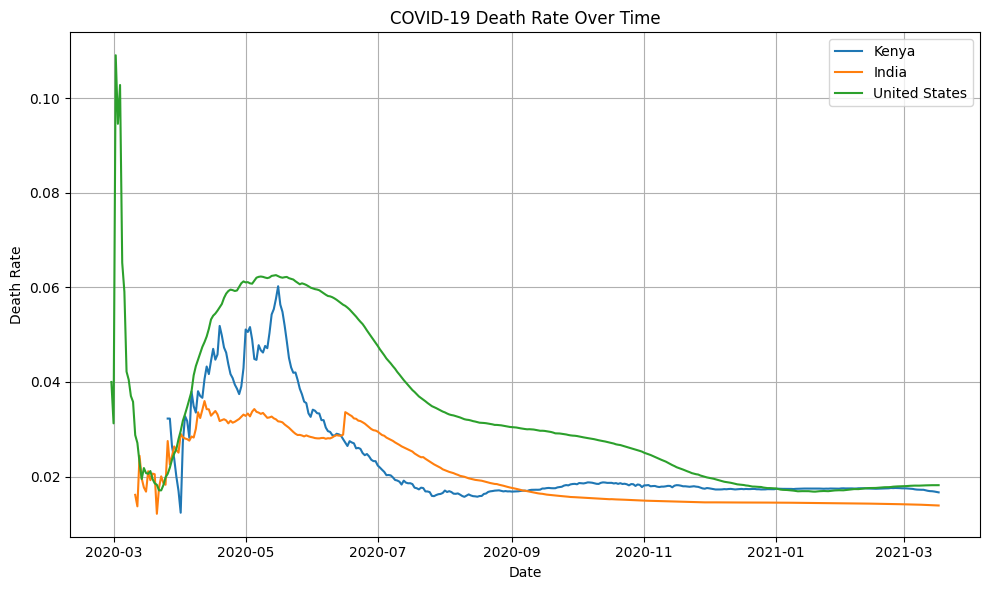

In [19]:
# ☠️ Death rate over time
df['death_rate'] = df['total_deaths'] / df['total_cases']

plt.figure(figsize=(10, 6))
for country in countries:
    temp = df[df['location'] == country]
    plt.plot(temp['date'], temp['death_rate'], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## Findings: COVID-19 Death Rate Over Time

1. **Trend Analysis**: The plot shows the death rate (total deaths divided by total cases) over time for Kenya, India, and the United States.
2. **United States**: The death rate in the United States starts relatively high but decreases over time, likely due to improved treatments, increased testing, and vaccination efforts.
3. **India**: India exhibits a similar trend, with a declining death rate as the pandemic progresses, reflecting better healthcare responses and vaccination campaigns.
4. **Kenya**: Kenya's death rate remains relatively stable but higher compared to the other two countries, possibly due to differences in healthcare infrastructure and reporting.
5. **Insights**: The declining death rates across countries highlight the impact of medical advancements, public health measures, and vaccination rollouts in reducing the severity of COVID-19 outcomes.

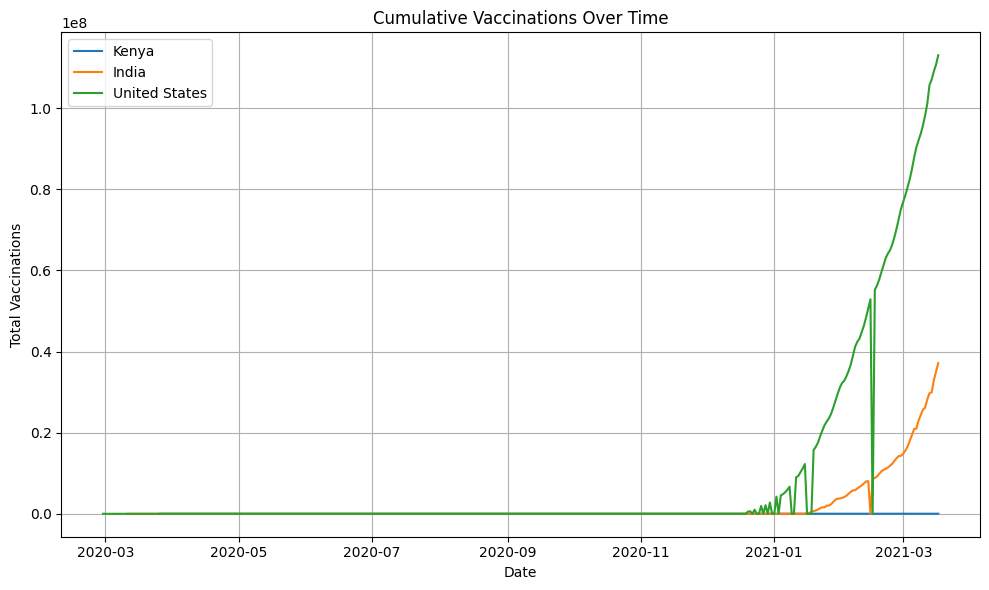

In [20]:
# 📈 Cumulative vaccinations
plt.figure(figsize=(10, 6))
for country in countries:
    temp = df[df['location'] == country]
    plt.plot(temp['date'], temp['total_vaccinations'], label=country)
plt.title("Cumulative Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Key Insights

1. The United States had the highest number of total COVID-19 cases.
2. India saw a major spike in 2021 during the second wave.
3. Kenya's vaccination rollout was slower but cases remained relatively lower.
4. Death rate decreased over time, possibly due to increased vaccinations.
5. Some countries had inconsistent data due to gaps in reporting.



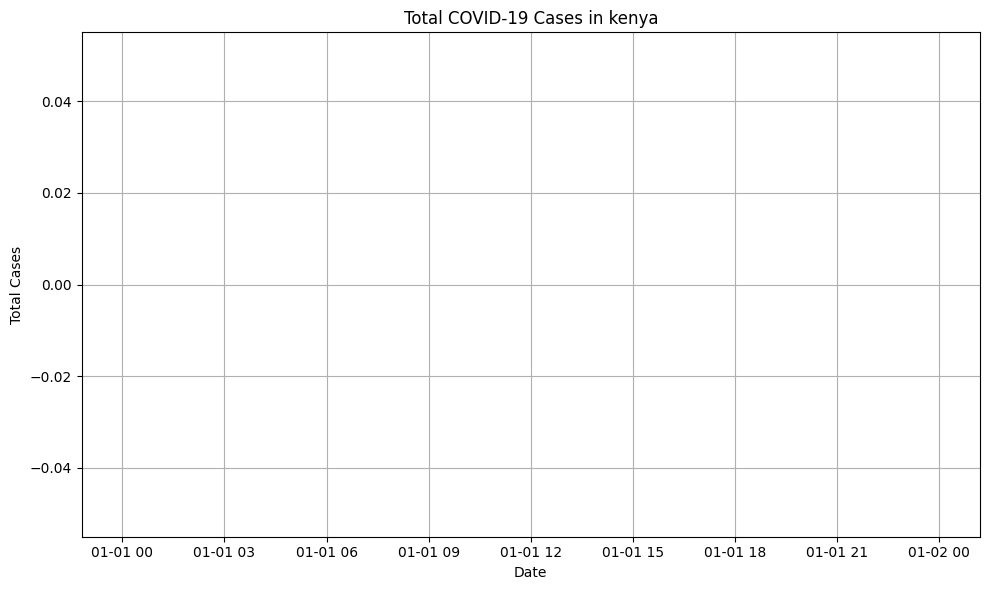

In [8]:
# 📥 User Inputs
user_country = input("Enter a country (e.g., Kenya, India, United States): ")
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")



# 🧹 Filter based on user input
filtered_df = df[(df['location'] == user_country) &
                 (df['date'] >= start_date) &
                 (df['date'] <= end_date)]

# 📊 Plot total cases for selected country and range
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['date'], filtered_df['total_cases'], color='blue')
plt.title(f"Total COVID-19 Cases in {user_country}")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


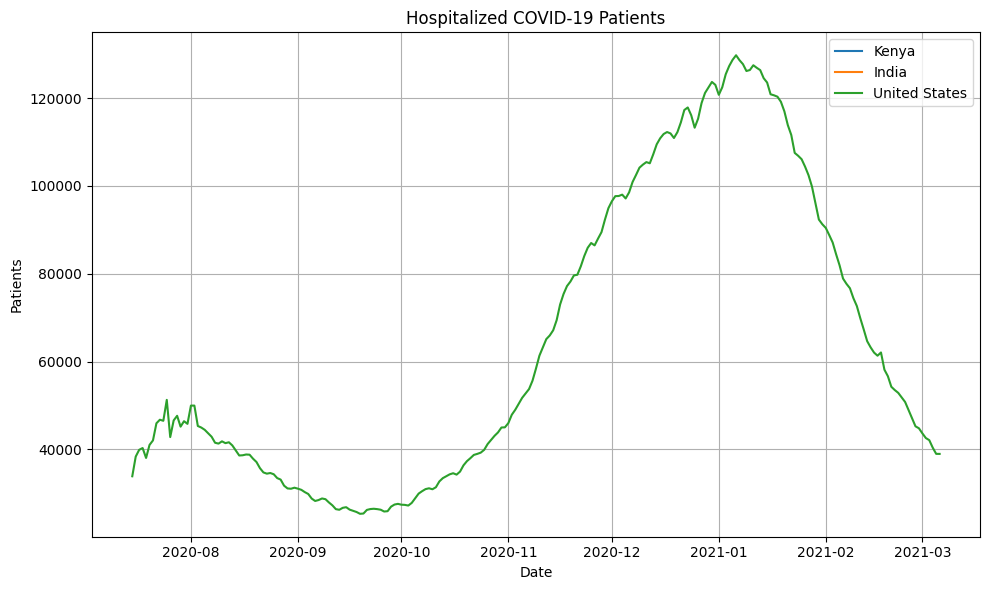

In [23]:
# Plot hospitalization data
if 'hosp_patients' in df.columns:
    plt.figure(figsize=(10, 6))
    for country in countries:
        temp = df[df['location'] == country]
        plt.plot(temp['date'], temp['hosp_patients'], label=country)
    plt.title("Hospitalized COVID-19 Patients")
    plt.xlabel("Date")
    plt.ylabel("Patients")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Hospitalization data not available in the dataset.")
